Column names in the dataset:
'Id'
'RI'
'Na'
'Mg'
'Al'
'Si'
'K'
'Ca'
'Ba'
'Fe'
'Type of glass'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB
None
               Id          RI          Na          Mg          Al          Si  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean   108.

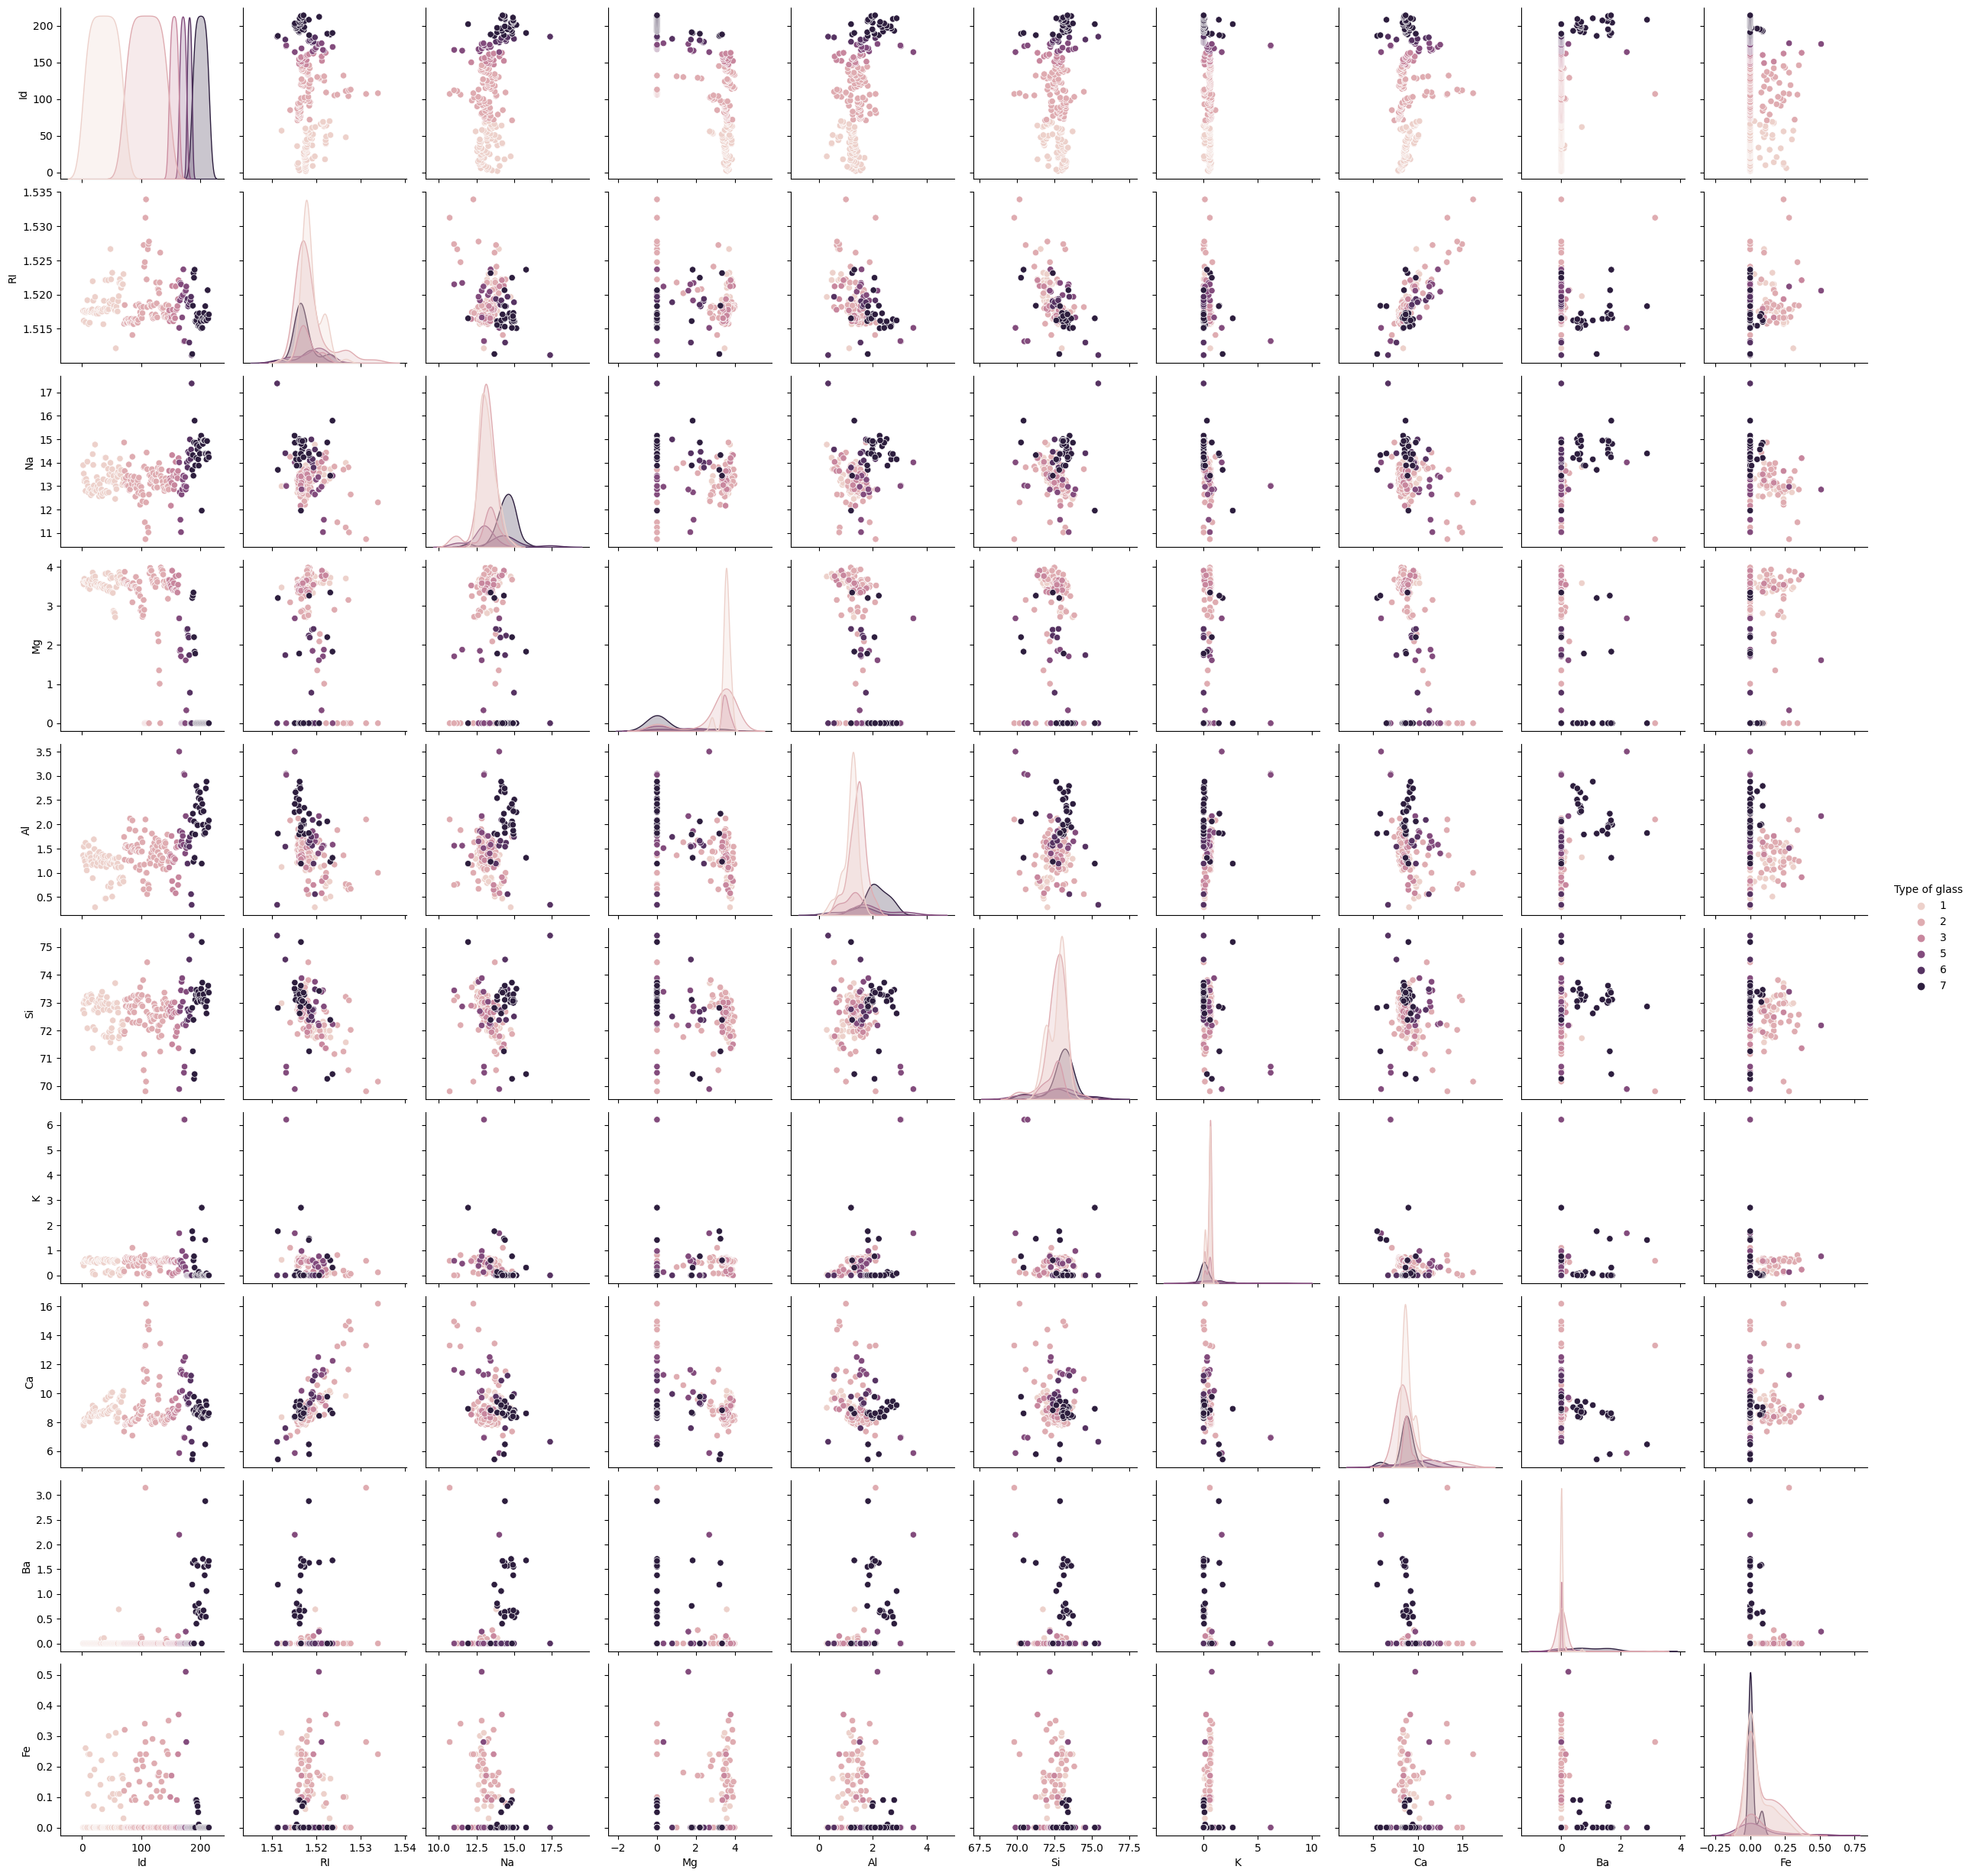

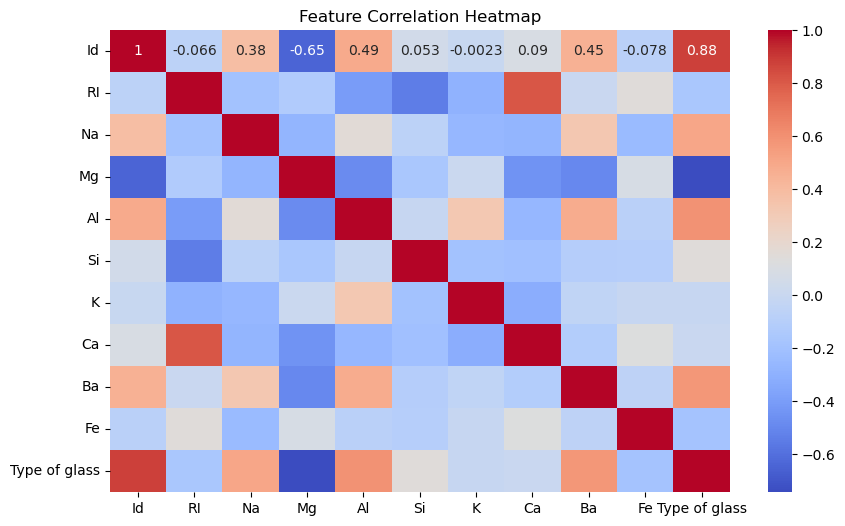

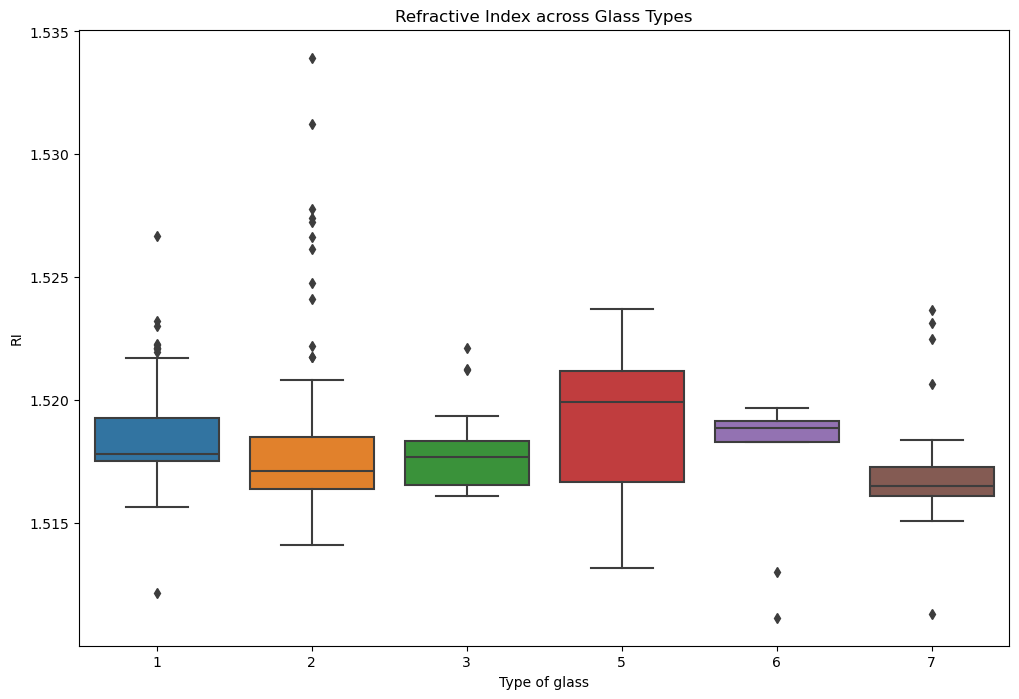

Confusion Matrix:
[[19  2  0  0  0  0]
 [ 1 19  0  2  1  0]
 [ 3  0  2  0  0  0]
 [ 0  1  0  1  0  2]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  9]]

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.90      0.86        21
           2       0.86      0.83      0.84        23
           3       1.00      0.40      0.57         5
           5       0.33      0.25      0.29         4
           6       0.67      1.00      0.80         2
           7       0.82      1.00      0.90         9

    accuracy                           0.81        64
   macro avg       0.75      0.73      0.71        64
weighted avg       0.82      0.81      0.80        64



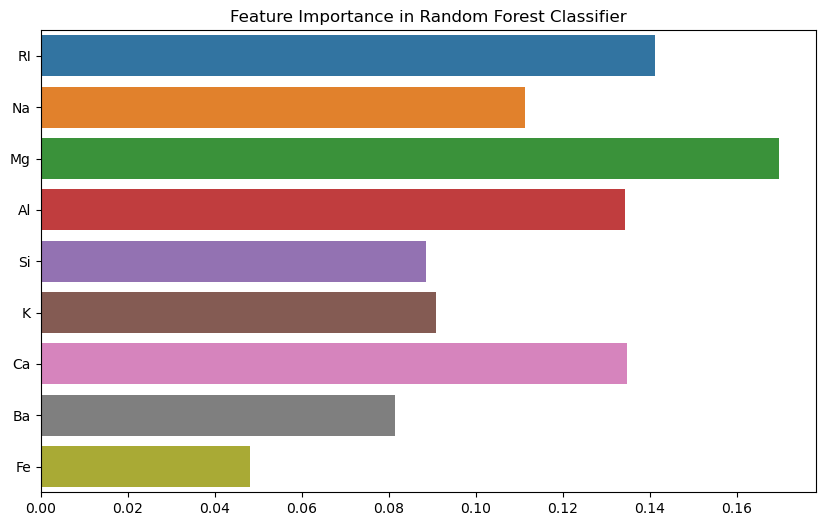

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')



# Loading the dataset and specifying the correct column names
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/refs/heads/main/glass.csv"
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
glass_df = pd.read_csv(url, names=columns, header=None)

# Droping the first row since it contains the header names
glass_df = glass_df.drop(index=0).reset_index(drop=True)

# Printing the actual column names to verify the fix
print("Column names in the dataset:")
for col in glass_df.columns:
    print(f"'{col}'")

print(glass_df.info())

print(glass_df.describe())

# Checking for missing values
print(glass_df.isnull().sum())

# Data visualization
# Pairploting to visualize relationships between features
sns.pairplot(glass_df, hue='Type of glass')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(glass_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Boxploting for Refractive Index by Glass Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type of glass', y='RI', data=glass_df)
plt.title('Refractive Index across Glass Types')
plt.show()

# Data Preprocessing
X = glass_df.drop(columns=['Id', 'Type of glass'])
y = glass_df['Type of glass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model using RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Random Forest Classifier')
plt.show()